# Linear Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<AxesSubplot:title={'center':'Weight and Height in adults'}, xlabel='Height', ylabel='Weight'>

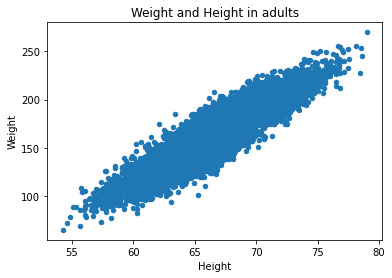

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

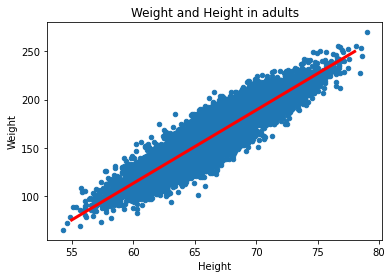

In [6]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [7]:
def line(x, w=0, b=0):
    return x * w + b

In [8]:
x = np.linspace(55, 80, 100)

In [9]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [10]:
yhat = line(x, w=0, b=0)

In [11]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

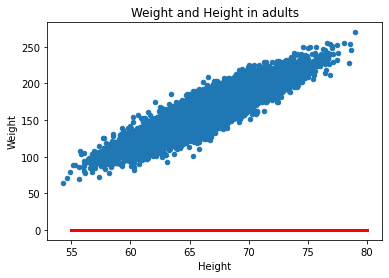

In [12]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [13]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [14]:
X = df[['Height']].values
y_true = df['Weight'].values

In [15]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [16]:
y_pred = line(X)

In [17]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [18]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

In [19]:
y_pred = line(X, w = 8, b = -370)
print(y_pred)
print(mean_squared_error(y_true, y_pred.ravel()))


[[220.77613614]
 [180.25523237]
 [222.88084313]
 ...
 [140.94393771]
 [182.27394505]
 [125.55396704]]
150.72643090981552


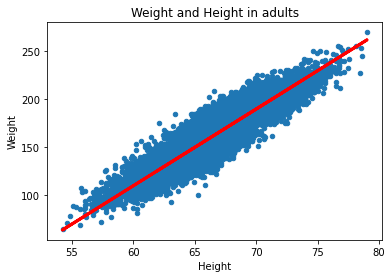

In [20]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red', linewidth=3)

In [21]:
# (XT * X)-1 * XT * Y


def linearRegression(X, y):
    X = np.c_[np.ones(X.size), X]
    return np.linalg.inv(X.transpose() @ X) @ X.transpose() @ y


print(linearRegression(X,y_true))

[-350.73719181    7.71728764]


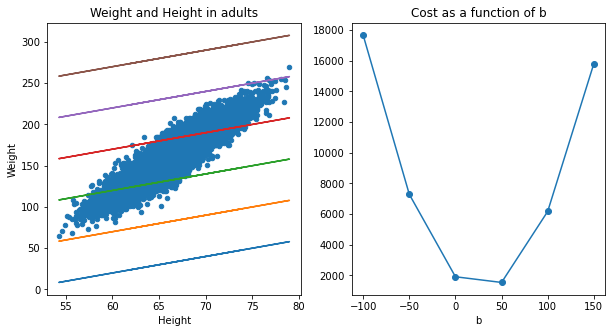

In [22]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b');

## Linear Regression with Keras

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [24]:
model = Sequential()

In [25]:
model.add(Dense(1, input_shape=(1,)))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [28]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 1ms/step - loss: 718.7273
Epoch 2/40
313/313 [==============================] - 0s 1ms/step - loss: 548.5961
Epoch 3/40
313/313 [==============================] - 0s 1ms/step - loss: 528.6580
Epoch 4/40
313/313 [==============================] - 1s 2ms/step - loss: 435.5292
Epoch 5/40
313/313 [==============================] - 0s 1ms/step - loss: 411.1838
Epoch 6/40
313/313 [==============================] - 1s 2ms/step - loss: 371.3782
Epoch 7/40
313/313 [==============================] - 0s 2ms/step - loss: 336.2001
Epoch 8/40
313/313 [==============================] - 0s 1ms/step - loss: 304.9404
Epoch 9/40
313/313 [==============================] - 0s 1ms/step - loss: 272.8458
Epoch 10/40
313/313 [==============================] - 0s 1ms/step - loss: 260.0967
Epoch 11/40
313/313 [==============================] - 0s 1ms/step - loss: 244.4121
Epoch 12/40
313/313 [==============================] - 0s 1ms/step - loss: 218.3730
E

In [29]:
y_pred = model.predict(X)

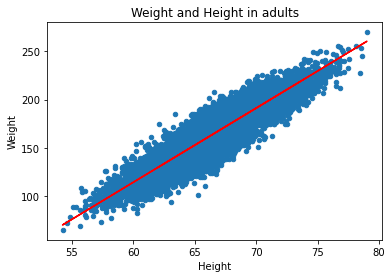

In [30]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [31]:
W, B = model.get_weights()

In [32]:
W

array([[7.7123027]], dtype=float32)

In [33]:
B

array([-348.64883], dtype=float32)

## Evaluating Model Performance

In [34]:
from sklearn.metrics import r2_score

In [35]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.852


### Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [38]:
len(X_train)

8000

In [39]:
len(X_test)

2000

In [40]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [41]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [42]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [43]:
from sklearn.metrics import mean_squared_error as mse

In [44]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	153.6
The Mean Squared Error on the Test set is:	154.6


In [45]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.850
The R2 score on the Test set is:	0.852


# Classification

In [46]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [47]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


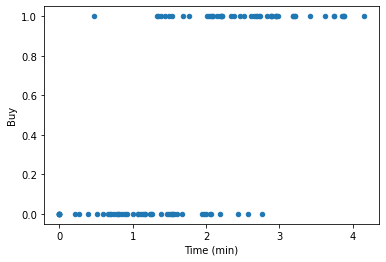

In [48]:
df.plot(kind='scatter', x='Time (min)', y='Buy');

In [49]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [50]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [52]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
4/4 [==============================] - 0s 2ms/step - loss: 1.1946 - accuracy: 0.5000
Epoch 2/25
4/4 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5000
Epoch 3/25
4/4 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.5800
Epoch 4/25
4/4 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.5900
Epoch 5/25
4/4 [==============================] - 0s 2ms/step - loss: 0.5565 - accuracy: 0.8100
Epoch 6/25
4/4 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.6500
Epoch 7/25
4/4 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.8100
Epoch 8/25
4/4 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7900
Epoch 9/25
4/4 [==============================] - 0s 2ms/step - loss: 0.4945 - accuracy: 0.8000
Epoch 10/25
4/4 [==============================] - 0s 2ms/step - loss: 0.4711 - accuracy: 0.8000
Epoch 11/25
4/4 [======================

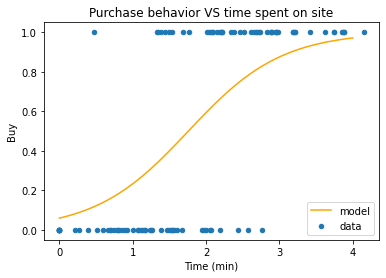

In [53]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [54]:
temp_class = model.predict(temp) > 0.5

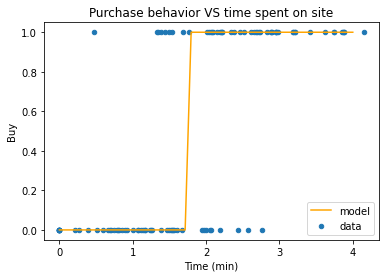

In [55]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [56]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.830


### Train/Test split


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [61]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [62]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [63]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.850
The test accuracy score is 0.750


In [64]:
import numpy as np
import torch as t
from torch.distributions import Normal, Categorical, Bernoulli
from torch.distributions import MultivariateNormal as MvNormal
import matplotlib.pyplot as plt
#Enable for prettier plots
#%matplotlib inline
from ipywidgets import FloatSlider, IntSlider, interact, interact_manual

In [65]:
W = t.randn((2,1), requires_grad=True)/100


xTrain = t.tensor(np.c_[X_train, np.ones(len(X_train))]).float()
yTrain = t.tensor(y_train).float()



for i in range(50000):
    L = Bernoulli(logits=xTrain@W).log_prob(yTrain).sum()
    
    dW = t.autograd.grad(outputs=L, inputs=(W,))[0]
    if 0==i % 1000:
        print(L.item())
        print(W)
    W.data += 0.001*dW

-4437.42724609375
tensor([[-0.0198],
        [ 0.0028]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.5381]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.5381]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.5381]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.5381]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.5381]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.5381]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.5381]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.5381]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.5381]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.5381]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.5381]], grad_fn=<DivBackward0>)
-22560.12890625
tensor([[-2.9504],
        [-1.538

C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\ipykernel_launcher.py:15: UserWarning: No contour levels were found within the data range.
  from ipykernel import kernelapp as app


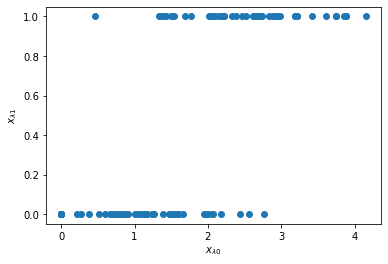

In [66]:
fig, ax = plt.subplots()
ax.set_xlabel("$x_{\lambda 0}$")
ax.set_ylabel("$x_{\lambda 1}$")
ax.scatter(X, y);

x0range = t.linspace(*ax.get_xlim(), 500)
x1range = t.linspace(*ax.get_ylim(), 500)

x0s, x1s = t.meshgrid(x0range, x1range)
xs = t.stack([x0s, t.ones(500, 500)], -1)



ps = Bernoulli(logits=xs@W.detach()).probs[:, :, 0]
ax.contour(x0s, x1s, 0.5<ps);

## Cross Validation

In [67]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [68]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(learning_rate=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [69]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [70]:
from sklearn.model_selection import cross_val_score, KFold

In [71]:
cv = KFold(3, shuffle=True)

In [72]:
scores = cross_val_score(model, X, y, cv=cv)

In [73]:
scores

array([0.91176468, 0.78787881, 0.75757575])

In [74]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8191 ± 0.0667


## Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y, y_class_pred)

array([[41,  9],
       [ 8, 42]], dtype=int64)

In [77]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [78]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,41,9
Buy,8,42


In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [80]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))


Precision:	0.824
Recall:  	0.840
F1 Score:	0.832


In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        50
           1       0.82      0.84      0.83        50

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



## Feature Preprocessing

### Categorical Features

In [83]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [84]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [85]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [86]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [87]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [88]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [89]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


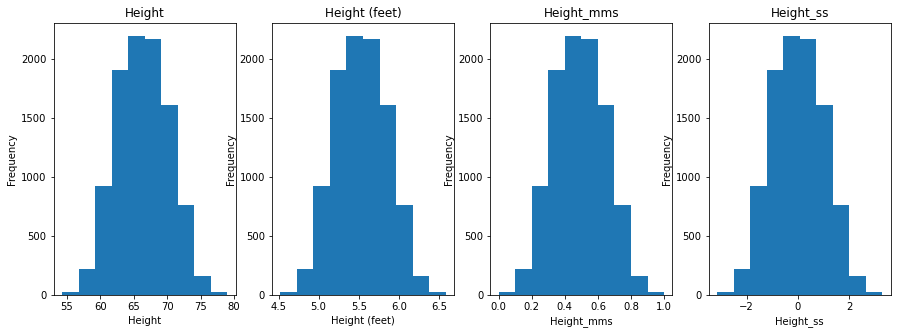

In [90]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature);

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

   sqft  bdrms  age   price
0  2104      3   70  399900
1  1600      3   28  329900
2  2400      3   44  369000
3  1416      2   49  232000
4  3000      4   75  539900


<AxesSubplot:ylabel='Frequency'>

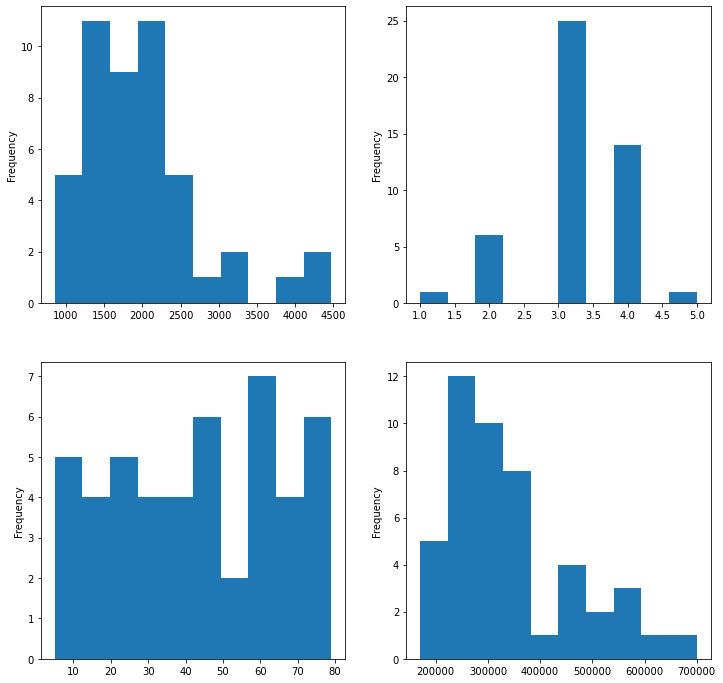

In [91]:
data = pd.read_csv("../data/housing-data.csv")
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
print(data.head())

data['sqft'].plot(kind='hist', ax = ax[0][0])
data['bdrms'].plot(kind='hist', ax = ax[0][1])
data['age'].plot(kind='hist', ax = ax[1][0])
data['price'].plot(kind='hist', ax = ax[1][1])

In [92]:
data['sqft_normal'] = mms.fit_transform(data[['sqft']])
data['bdrms_normal'] = mms.fit_transform(data[['bdrms']])
data['age_normal'] = mms.fit_transform(data[['age']])
data['price_normal'] = mms.fit_transform(data[['price']])

X = data[['sqft_normal', 'bdrms_normal','age_normal']].values
Y = data[['price_normal']].values

In [93]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.summary()
model.compile(Adam(learning_rate=0.9), 'mean_squared_error')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2)


In [95]:
W, B = model.get_weights()

W[0, 0] = 0.0
B[0] = 0.0

model.set_weights((W, B))

model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 0s 3ms/step - loss: 0.8663
Epoch 2/20
2/2 [==============================] - 0s 3ms/step - loss: 0.3858
Epoch 3/20
2/2 [==============================] - 0s 2ms/step - loss: 1.6726
Epoch 4/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3364
Epoch 5/20
2/2 [==============================] - 0s 4ms/step - loss: 0.5809
Epoch 6/20
2/2 [==============================] - 0s 2ms/step - loss: 0.3401
Epoch 7/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1182
Epoch 8/20
2/2 [==============================] - 0s 4ms/step - loss: 0.4144
Epoch 9/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0723
Epoch 10/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1737
Epoch 11/20
2/2 [==============================] - 0s 2ms/step - loss: 0.1711
Epoch 12/20
2/2 [==============================] - 0s 2ms/step - loss: 0.0407
Epoch 13/20
2/2 [==============================] - 0s 3ms/step - loss: 0.

In [96]:


Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

print(r2_score(Y_train, Y_pred_train))
print(r2_score(Y_test, Y_pred_test))

0.4083035040194809
0.6945059349019457


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [97]:
data = pd.read_csv("../data/HR_comma_sep.csv")

print(data.head())
print(data.info())
print(data.describe())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [98]:
left = data['left']

pretty_confusion_matrix(left, np.zeros(len(left)), ['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,11428,0
Leave,3571,0


In [99]:
falses = np.full(len(left), True)

print("Precision:\t{:0.3f}".format(precision_score(left, falses)))
print("Recall:  \t{:0.3f}".format(recall_score(left, falses)))
print("F1 Score:\t{:0.3f}".format(f1_score(left, falses)))

Precision:	0.238
Recall:  	1.000
F1 Score:	0.385


In [100]:
print(data['sales'].unique())
print(data['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [101]:
data['number_project_scaled'] = mms.fit_transform(data[['number_project']])
data['average_montly_hours_scaled'] = mms.fit_transform(data[['average_montly_hours']])
data['time_spend_company_scaled'] = mms.fit_transform(data[['time_spend_company']])

df_dummies = pd.get_dummies(data[['sales', 'salary']])

X = pd.concat([data[['satisfaction_level', 'last_evaluation','number_project_scaled', 'average_montly_hours_scaled','time_spend_company_scaled','Work_accident','promotion_last_5years']], df_dummies], axis = 1).values
Y = data[['left']].values

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2)

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(20,), activation='sigmoid'))
model.summary()
model.compile(Adam(learning_rate=0.9), 'binary_crossentropy')

In [104]:
W, B = model.get_weights()

W[0, 0] = 0.0
B[0] = 0.0

model.set_weights((W, B))

model.fit(X_train, Y_train, epochs=20)

Epoch 1/20


ValueError: in user code:

    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\engine\training.py:850 train_function  *
        return step_function(self, iterator)
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\engine\training.py:840 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\engine\training.py:833 run_step  **
        outputs = model.train_step(data)
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\engine\training.py:792 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:187 __call__
        self.build(y_pred)
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:136 build
        self._losses = nest.map_structure(self._get_loss_object, self._losses)
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\util\nest.py:867 map_structure
        structure[0], [func(*x) for x in entries],
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\util\nest.py:867 <listcomp>
        structure[0], [func(*x) for x in entries],
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:276 _get_loss_object
        loss = losses_mod.get(loss)
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\losses.py:2078 get
        return deserialize(identifier)
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\losses.py:2037 deserialize
        printable_module_name='loss function')
    C:\Users\mikew\anaconda3\envs\ztdl\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:703 deserialize_keras_object
        .format(printable_module_name, object_name))

    ValueError: Unknown loss function: binary_cross_entropy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [ ]:
Y_pred_train = model.predict_classes(X_train)
Y_pred_test = model.predict_classes(X_test)

# print(r2_score(Y_train, Y_pred_train))
# print(r2_score(Y_test, Y_pred_test))

In [ ]:
pretty_confusion_matrix(Y_test, Y_pred_test, ['Stay', 'Leave'])

In [ ]:
print("Precision:\t{:0.3f}".format(precision_score(Y_test, Y_pred_test)))
print("Recall:  \t{:0.3f}".format(recall_score(Y_test, Y_pred_test)))
print("F1 Score:\t{:0.3f}".format(f1_score(Y_test, Y_pred_test)))

In [ ]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=10, verbose=0)

In [ ]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, Y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))
